In [85]:
from integrators import RK4, RK4_timestepper, FE_timestepper
from tools import ScalarTool, VectorTool, create_grid, dt_cfl
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

import time

# Parameters
L = 1.0
N = 64
Pe = 100.0
kappa = 1.0/Pe
U=1.0

# Create tool box
st = ScalarTool(N,L)
vt = VectorTool(N,L)
okit = OperatorKit(N, L, kappa)

# Initial condition
X = create_grid(N, L)
th0 = np.sin((2.0 * np.pi / L) * X[0])

# Create operators: d th / dt = operator (th)
def lit_op(scalar):
    return okit.lit_energy_op(scalar,U)

def sin_op(scalar):
    return okit.sin_flow_op(scalar)

time = np.linspace(0,0.2,200)
th0 = RK4_timestepper(sin_op,th0,0.001)
th = RK4(lit_op,th0,time)


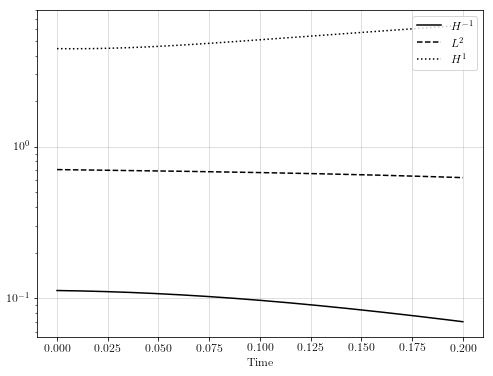

In [86]:
from post_processing import plot_norms, compute_norms

plt.figure(figsize = (8,6))

plot_norms(time,th,N,L,high_quality = True)
plt.show()

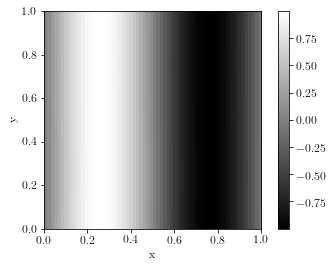

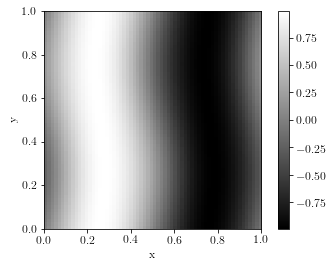

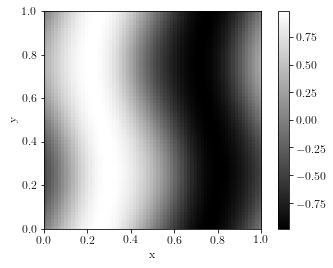

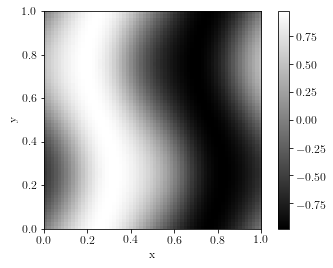

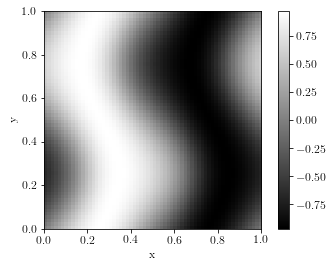

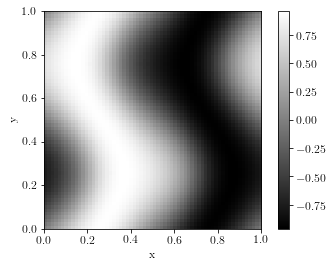

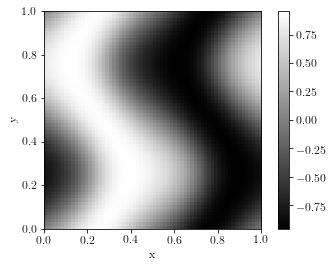

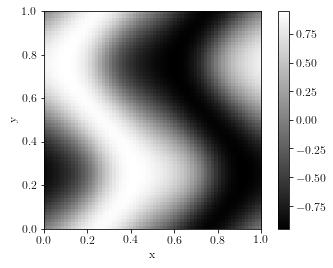

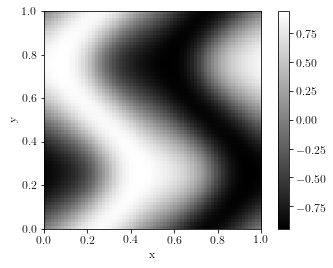

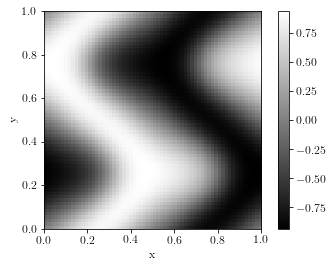

In [30]:
for i in range(len(th)):
    if i %20 == 0:
        st.plot(th[i])
        plt.show()

In [25]:
from integrators import RK4, RK4_timestepper, FE_timestepper
from tools import ScalarTool, VectorTool, create_grid, dt_cfl
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

# Parameters
L = 1.0
N = 64
Pe = 100.0
kappa = 1.0 / Pe
U = 1.0

# Create tool box
st = ScalarTool(N, L)
vt = VectorTool(N,L)
okit = OperatorKit(N, L, kappa)

# Initial condition
X = create_grid(N, L)
th0 = np.sin((2.0 * np.pi / L) * X[0])
th0_hat = st.fft(th0)

# Create operators: d th / dt = operator (th)
def lit_op_hat(scalar_hat):
    return okit.lit_energy_op_hat(scalar_hat, U)

def lit_op(scalar):
    return okit.lit_energy_op(scalar, U)

def sin_op_hat(scalar_hat):
    return okit.sin_flow_op_hat(scalar_hat)

def sin_op(scalar):
    return okit.sin_flow_op(scalar)

time = np.linspace(0, 0.02, 20)
th0 = RK4_timestepper(sin_op, th0, 0.001)
th_hist = RK4(lit_op, th0, time)

th0_hat = RK4_timestepper(sin_op_hat, th0_hat, 0.001)
th_hist_hat = RK4(lit_op_hat, th0_hat, time)
th2_hist = np.array([st.ifft(th_hat) for th_hat in th_hist_hat])


In [90]:
N=6
scalar_rhat=np.random.random((N,N//2+1))+1j*np.random.random(((N,N//2+1)))
b=np.conj(np.fliplr(scalar_rhat[:, 1:-1]))
a=scalar_rhat
print(np.shape(a))
print(np.shape(b))
c=np.concatenate((a,b),axis=1)
c2=np.concatenate((scalar_rhat, np.conj(np.fliplr(scalar_rhat[:, 1:-1]))), axis=1)
print(np.amax(np.abs(c-c2)))
print(np.allclose(c,c2))
np.shape(c)

(6, 4)
(6, 2)
0.0
True


(6, 6)

In [43]:
10//2


5

In [73]:
print(st.N)
print(st.kx[1:st.N//2])

64
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.]


In [89]:
N=6
v_rhat=np.random.random((2,N,N//2+1))+1j*np.random.random(((2,N,N//2+1)))
v_hat=np.concatenate((v_rhat, np.conj(np.fliplr(v_rhat[:,:, 1:-1]))), axis=2)
v_rhat2 = v_hat[:,:,0:(N//2+1)]
print(np.shape(v_rhat2))
print(np.amax(np.abs(v_rhat2-v_rhat)))
print(np.allclose(v_rhat2,v_rhat))

(2, 6, 4)
0.0
True


In [155]:
from integrators import RK4, RK4_timestepper, FE_timestepper
from tools import ScalarTool, VectorTool, create_grid, dt_cfl
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

import time

# Parameters
L = 1.0
N = 64
Pe = 100.0
kappa = 1.0/Pe
U=1.0

# Create tool box
st = ScalarTool(N,L)
vt = VectorTool(N,L)
okit = OperatorKit(N, L, kappa)

th = np.random.random((st.N,st.N))
th_hat = np.fft.fftn(th)
th_rhat = st.hat_2_rhat(th_hat)
th2= np.fft.irfftn(th_rhat)
# st.plot(th)
# plt.show()
# st.plot(th2)
# plt.show()
print(np.allclose(th,th2))

th_rhat_2 = np.fft.rfftn(th)
#th_hat_2 = st.rhat_2_hat(th_rhat_2)

# print(np.shape(np.fliplr(th_rhat_2[:, 1:-1])))
# th_hat_2=np.concatenate([th_rhat_2, np.conj(np.fliplr(th_rhat_2[:, 1:-1]))], axis=1)
th_hat_2=np.concatenate((th_rhat,np.conj(th_rhat)[:,-2:0:-1]),axis=1)
th3 = np.real(np.fft.ifftn(th_hat_2))


# st.plot(th)
# plt.show()
# st.plot(th2)
# plt.show()
#print(np.allclose(th,th3))
# print(np.allclose(th_hat,th_hat_2))
b=th_hat[:,(N//2+1):]
b2=np.conj(np.fliplr(th_rhat_2[:, 1:-1]))
print(np.isclose(b,b2))

# # print(np.allclose(th,th2))

# # print(th_hat)
# # print(np.conj(th_hat_2))

True
[[ True  True  True ...,  True  True  True]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


In [21]:
N=st.N
scalar = np.random.random((st.N,st.N))
scalar_rhat=np.fft.rfftn(scalar)
b=np.conj(np.fliplr(scalar_rhat[:, 1:-1]))
a=scalar_rhat
print(np.shape(a))
print(np.shape(b))
c=np.concatenate((a,b),axis=1)
c2=np.concatenate((scalar_rhat, np.conj(np.fliplr(scalar_rhat[:, 1:-1]))), axis=1)
print(np.amax(np.abs(c-c2)))
print(np.allclose(c,c2))
np.shape(c)

(64, 33)
(64, 31)
0.0
True


(64, 64)

In [36]:
np.conj(4.70080477e+00j)

-4.7008047700000004j

In [44]:
print(th_rhat_2[:, 1:-1])
print(np.shape(th_rhat_2[:, 1:-1]))
print(np.shape(np.conj(np.fliplr(th_rhat_2[:, 1:-1]))))
print(np.conj(np.fliplr(th_rhat_2[:, 1:-1])))

[[  3.33066907e-16 +1.11022302e-16j]
 [ -8.88178420e-16 -4.70080477e+00j]
 [  3.33066907e-16 -1.11022302e-16j]
 [  2.22044605e-16 +4.70080477e+00j]]
(4, 1)
(4, 1)
[[  3.33066907e-16 -1.11022302e-16j]
 [ -8.88178420e-16 +4.70080477e+00j]
 [  3.33066907e-16 +1.11022302e-16j]
 [  2.22044605e-16 -4.70080477e+00j]]


In [126]:
a=np.fft.fft([0.,1,0,-1,1.5,0])
b=np.fft.rfft([0.,1,0,-1,1.5,0])

print(a[-1],np.conj(b[1]))
c=np.concatenate([b,np.conj(b[-1:1:-1])], axis=0)
print(np.allclose(a,c))
print(a)
print(c)

(0.75-0.433012701892j) (0.75-0.433012701892j)
False
[ 1.50 +0.00000000e+00j  0.75 +4.33012702e-01j -2.25 -2.16506351e+00j
  1.50 -1.66533454e-16j -2.25 +2.16506351e+00j  0.75 -4.33012702e-01j]
[ 1.50+0.j          0.75+0.4330127j  -2.25-2.16506351j  1.50+0.j          1.50-0.j
 -2.25+2.16506351j]


In [88]:
print(np.allclose(th_hat,th_hat_2))
b=th_hat[:,(N//2+1):]
b2=np.conj(np.fliplr(th_rhat_2[:, 1:-1]))
print(np.isclose(b,b2))

False
[[ True]
 [False]
 [ True]
 [False]]


In [175]:
b=[0,1,2,3,4]
b[-2:0:-1]
a=np.array([[1,2,3,4,5,6],[6,2,3,4,3,2],[1,2,4,4,2,6],[1,2,3,3,5,6],[1,3,3,4,5,1],[1,6,3,4,4,6]])
print(a)
#print(np.fliplr(a[:,1:-1]))

a=np.random.random((st.N,st.N))

f=np.fft.fftn(a)
fr=np.fft.rfftn(a)

print(f)
print(fr)

f2=np.concatenate((fr,np.conj(fr)[:,-2:0:-1]),axis=1)
np.isclose(f,f2)
print(f[:,-1],f[:,1])

[[1 2 3 4 5 6]
 [6 2 3 4 3 2]
 [1 2 4 4 2 6]
 [1 2 3 3 5 6]
 [1 3 3 4 5 1]
 [1 6 3 4 4 6]]
[[  2.03336299e+03 +0.j          -1.15299872e+01+17.21097429j
   -4.74850815e+00 -2.71076213j ...,  -6.05458194e+00+16.19721517j
   -4.74850815e+00 +2.71076213j  -1.15299872e+01-17.21097429j]
 [ -7.18241144e+00 +2.93772338j  -1.11549411e+01-15.46662227j
   -1.21623151e+01 +3.40903946j ...,  -1.14576111e+01 -6.12588267j
    1.70170699e+01+10.16588293j   2.50101646e+00-13.4755242j ]
 [ -5.23456339e+00+10.41679007j  -1.76664593e+00 -5.56610109j
    1.38187601e+01 -2.21844171j ...,  -9.22880941e+00 -1.05526871j
    1.19665328e+01-15.53272744j   3.06558995e+01 -3.6521506j ]
 ..., 
 [  4.11607689e+00+10.88214106j  -2.28738153e+01-24.37571982j
   -1.33830751e+01-19.53052088j ...,   9.07098793e+00 -2.13080686j
    1.88008700e+01+10.03924214j   3.33485566e+00+33.53201622j]
 [ -5.23456339e+00-10.41679007j   3.06558995e+01 +3.6521506j
    1.19665328e+01+15.53272744j ...,   6.33833936e-01 +7.54588262j
    1.

In [169]:
N=64
Nf= N // 2 + 1
kx = np.fft.fftfreq(N, 1. / N).astype(float)
ky = kx[:Nf].copy()
ky[-1] *= -1
K = np.array(np.meshgrid(kx, ky, indexing='ij'), dtype=int)
print(K)

[[[ 0  0  0 ...,  0  0  0]
  [ 1  1  1 ...,  1  1  1]
  [ 2  2  2 ...,  2  2  2]
  ..., 
  [-3 -3 -3 ..., -3 -3 -3]
  [-2 -2 -2 ..., -2 -2 -2]
  [-1 -1 -1 ..., -1 -1 -1]]

 [[ 0  1  2 ..., 30 31 32]
  [ 0  1  2 ..., 30 31 32]
  [ 0  1  2 ..., 30 31 32]
  ..., 
  [ 0  1  2 ..., 30 31 32]
  [ 0  1  2 ..., 30 31 32]
  [ 0  1  2 ..., 30 31 32]]]


In [173]:
kx

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31., -32.,
       -31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21.,
       -20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.])

In [174]:
ky

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.])

In [178]:
print(f[1:3,-1],np.conj(f[1:3,1]))

[  2.50101646-13.4755242j  30.65589952 -3.6521506j] [-11.15494112+15.46662227j  -1.76664593 +5.56610109j]
